In [86]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# Constantes du mouvement.
g = 9.81  # gravitational acceleration (m.s^{-2})
m = 1.0  # masse (kg)
l = 1.0  # longueur(m)
c = 6 / (m * l ** 2)
c1 = m * l ** 2
c2 = c ** 2

In [88]:
# Fixer les conditions initiales.
theta1o = 0.5 * np.pi
theta2o = 0.5 * np.pi
dy1o = 0.0
dy2o = 0.0
x1o = 0.5 * l * np.sin(theta1o)
y1o = - 0.5 * l * np.cos(theta1o)
x2o = l * np.sin(theta1o) + l * 0.5 * np.sin(theta2o)
y2o = - l * np.cos(theta1o) - l * 0.5 * np.cos(theta2o)

In [89]:
# Cette fonction donne comme solution la partie à droite des équations lagrangiennes et des positions du centre de masse des barreaux
def rhs_pendule(t,u):
    theta1, theta2, p1, p2, x1, y1, x2, y2 = u
    rhs = np.array([c * (2 * p1 - 3 * np.cos(theta1 - theta2) * p2) / (16 - 9 * ((np.cos(theta1 - theta2)) ** 2)),
                    c * (8 * p2 - 3 * np.cos(theta1 - theta2) * p1) / (16 - 9 * ((np.cos(theta1 - theta2)) ** 2)),
                    - 0.5 * c1 * c * (2 * p1 - 3 * np.cos(theta1 - theta2) * p2) / (16 - 9 *
                        ((np.cos(theta1 - theta2)) ** 2)) * c * (8 * p2 - 3 * np.cos(theta1 - theta2) * p1) /
                        (16 - 9 * ((np.cos(theta1 - theta2)) ** 2)) * np.sin(theta1 -theta2)
                        - 0.5 * c1 * 3 * (g / l) * np.sin(theta1),
                    0.5 * c1 * c * (2 * p1 - 3 * np.cos(theta1 - theta2) * p2) / (16 - 9 *
                        ((np.cos(theta1 - theta2)) ** 2)) * c * (8 * p2 - 3 * np.cos(theta1 - theta2) * p1) /
                        (16 - 9 * ((np.cos(theta1 - theta2)) ** 2)) * np.sin(theta1 - theta2)
                        - 0.5 * c1 * (g / l) * np.sin(theta2),
                    0.5 * l * np.cos(theta1) * c * (2 * p1 - 3 * np.cos(theta1 - theta2) * p2) / (16 - 9 *
                        ((np.cos(theta1 - theta2)) ** 2)),
                    0.5 * l *np.sin(theta1) * c * (2 * p1 - 3 * np.cos(theta1 - theta2) * p2) / (16 - 9 *
                        ((np.cos(theta1 - theta2)) ** 2)),
                    l * np.cos(theta1) * c * (2 * p1 - 3 * np.cos(theta1 - theta2) * p2) / (16 - 9 *
                        ((np.cos(theta1 - theta2)) ** 2)) + l * 0.5 * np.cos(theta2) * c * (8 * p2 - 3 *
                        np.cos(theta1 - theta2) * p1) / (16 - 9 * ((np.cos(theta1 - theta2)) ** 2)),
                    l * np.sin(theta1) * c * (2 * p1 - 3 * np.cos(theta1 - theta2) * p2) / (16 - 9 *
                        ((np.cos(theta1 - theta2)) ** 2)) + l * 0.5 * np.sin(theta2) * c * (8 * p2 - 3 *
                        np.cos(theta1 - theta2) * p1) / (16 - 9 * ((np.cos(theta1 - theta2)) ** 2))])
    return rhs

In [90]:
# Métode Runge-Kutta du 4è ordre
def rk4_step(y, f, h, *args):
    t = n*h
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    k3 = f(t + h/2, y + h/2 * k2)
    k4 = f(t + h, y + h * k3)
    y += h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [91]:
T = 20.0  # intervalle du temps
dt = 0.001  # taille du time-step 
N = int(T / dt) + 1  # nombre de time steps
t = np.linspace(0.0, T, num=N)  # grille du temps

In [92]:
# Création de la liste.
u_rk4 = np.empty((N, 8))

In [93]:
# Fixer les conditions initiales.
u_rk4[0] = np.array([theta1o, theta2o, dy1o, dy2o, x1o, y1o, x2o, y2o])

In [94]:
# Intégration sur le temps.
for n in range(N - 1):
    u_rk4[n + 1] = rk4_step(u_rk4[n], rhs_pendule, dt)

In [95]:
# Obtenir les variables au cours du temps.
theta1_rk4 = u_rk4[:, 0]
theta2_rk4 = u_rk4[:, 1]
p1_rk4 = u_rk4[:, 2]
p2_rk4 = u_rk4[:, 3]
x1_rk4 = u_rk4[:, 4]
y1_rk4 = u_rk4[:, 5]
x2_rk4 = u_rk4[:, 6]
y2_rk4 = u_rk4[:, 7]

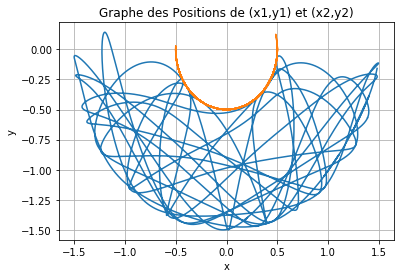

In [107]:
# Graphe de la position (x1,y1) et (x2,y2) au cours de T=20s
plt.grid()
plt.title('Graphe des Positions de (x1,y1) et (x2,y2)')  
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x2_rk4, y2_rk4)
plt.plot(x1_rk4, y1_rk4)
plt.show()

In [97]:
# Position de l'extremité du 2è barreau
x3_20 = x2_rk4[-1] - 0.5 * np.cos(np.abs(theta2_rk4[-1] + 0.5 * np.pi))
y3_20 = y2_rk4[-1] + 0.5 * np.sin(np.abs(theta2_rk4[-1] + 0.5 * np.pi))
print(x3_20, y3_20)

0.06009011959759991 0.04914958330522684


In [98]:
# Fixer la listede la taille des time-step.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]
u_values = []

In [99]:
for dt in dt_values:
    N = int(T / dt) + 1  
    u = np.empty((N, 8))
    u[0] = np.array([theta1o, theta2o, dy1o, dy2o, x1o, y1o, x2o, y2o])
    for n in range(N - 1):
        u[n + 1] = rk4_step(u_rk4[n], rhs_pendule, dt, l, g, c, c1, c2)
    u_values.append(u)

In [100]:
def l1_diff(u_coarse, u_fine, dt):
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * np.sum(np.abs(u_coarse - u_fine[::ratio]))
    return diff

In [101]:
diff_values = []
for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:, 2], dt)
    diff_values.append(diff)

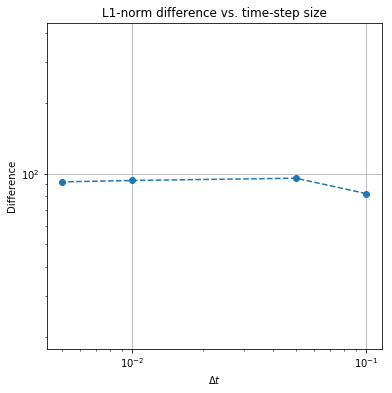

In [103]:
# Graphe de la différence versus la taille du time-step.
plt.figure(figsize=(6.0, 6.0))
plt.title('L1-norm difference vs. time-step size')  
plt.xlabel('$\Delta t$')  
plt.ylabel('Difference')
plt.grid()
plt.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  
plt.axis('equal');  

In [104]:
r = 2  
h = 0.001 
dt_values2 = [h, r * h, r**2 * h]
u_values2 = []

In [105]:
for dt in dt_values2:
    N = int(T / dt) + 1  
    u = np.empty((N, 8))
    u[0] = np.array([theta1o, theta2o, dy1o, dy2o, x1o, y1o, x2o, y2o])
    for n in range(N - 1):
        u[n + 1] = rk4_step(u_rk4[n], rhs_pendule, dt, l, g, c, c1, c2)
    u_values2.append(u)

In [106]:
# Calculer l'ordre de covergence
f2_f1 = l1_diff(u_values2[1][:, 2], u_values2[0][:, 2], dt_values2[1])
f3_f2 = l1_diff(u_values2[2][:, 2], u_values2[1][:, 2], dt_values2[2])
p = math.log(f3_f2 / f2_f1) / math.log(r)
print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 0.001


In [ ]:
# PARTIE 3: Animation (pas finie - ne marche pas)
# On crée la liste de positions (x1, x2)
def positions():
    u_hist = [[u_rk4[0].copy()[4],u_rk4[0].copy()[5]]
    for n in range(int(T/dt)):
        u = [rk4_step(u_rk4[n], rhs_pendule, dt)[4],rk4_step(u_rk4[n], rhs_pendule, dt)[5]]
        u_hist.append(u.copy())
    return u_hist

u_hist = positions()

In [ ]:
#Prepararons l'animation
fig = plt.figure(figsize=(5.0, 5.0))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
line = plt.plot(u_hist,
                   color='C0', linestyle='-', linewidth=2)[0]
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
fig.tight_layout()
#Nous associons un indice a chaque paire de coordonnees
def update_plot(n, u_hist):
    line.set_ydata(u_hist[n])

In [ ]:
#Animantion pour un point
anim = animation.FuncAnimation(fig,update_plot,
                               frames=int(T/dt), fargs=(u_hist,),
                               interval=20)
HTML(anim.to_html5_video())
